In [ ]:
#..........................案例1:
#.......................... 理解训练模型
#...线性回归（参数计算矩阵、均方误差）
# 在特征很大的情况下XTX的逆计算是比较慢的，可以考虑梯度下降优化算法
# 标准化等可以加快训练
#...梯度下降
# 梯度下降是一种非常通用的优化算法，它能够很好地解决一系列问题。梯度下降的整体思路是通过的迭代来逐渐调整参数使得损失函数达到最小值。
# 线性回归模型的均方差损失函数是一个凸函数，可以用梯度下降法
#...批量梯度下降（其实就是梯度下降的多维形式）,但是对于非线性方程，作用很大，因为对单维操作无法找到全局最优
#...随机梯度下降（在每一步的梯度计算上只随机选取训练集中的一个样本）
# 虽然随机性可以很好的跳过局部最优值，但同时它却不能达到最小值
#...多项式回归

In [8]:
# 梯度下降举例（回归）：
import numpy as np
# 数据
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]
# 批量梯度下降
eta = 0.1 # 学习率
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # 随机初始值
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
print('批量梯度下降：\n',theta)
# 随机梯度下降
n_epochs = 50 # 迭代次数，一般50就够了
t0, t1 = 5, 50 # learning_schedule的超参数（非常重要的参数，一般由大到小，“跳过局部最小值，再全局最小值徘徊”）
def learning_schedule(t):
    return t0 / (t + t1)
theta = np.random.randn(2,1)
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1] # 任意一个x
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch * m + i) # 变化的学习率
        theta = theta - eta * gradients
print('随机梯度下降：\n',theta)
# 机器学习包
# 随机梯度下降
from sklearn.linear_model import SGDRegressor
sgd_reg= SGDRegressor(n_iter_no_change=20,penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())
print('随机梯度下降【包】：\n',sgd_reg.intercept_, sgd_reg.coef_)

批量梯度下降：
 [[4.33480247]
 [2.73553372]]
随机梯度下降：
 [[4.35991176]
 [2.78465423]]
随机梯度下降【包】：
 [4.36136697] [2.75771562]


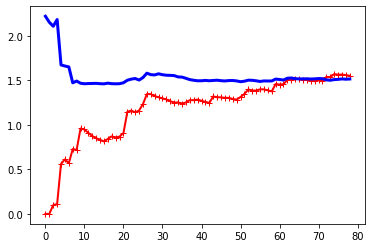

图形结果（欠拟合）说明，模型设定错误，增加样本并不能有所改善。
图形结果（过拟合）说明，提供更多的训练数据可以改善模型效果


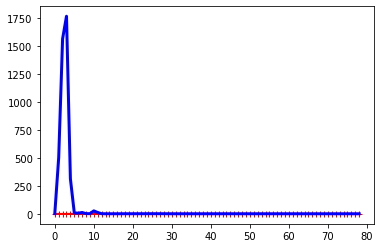

In [18]:
# 多项式回归
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly_features.fit_transform(X) # X_poly变为X X^2组成的数组
# 若X是多维数组，X_poly将包含交互项
# 除了交叉验证多项式几次方比较合适，还可以直接看学习曲线：
# 学习曲线（基于交叉验证）
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], [] # 训练误差，预测误差
    for m in range(1, len(X_train)): # 训练数据逐渐增加
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m]) # 预测值
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m])) # train
        val_errors.append(mean_squared_error(y_val_predict, y_val)) # test
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.show()
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
print('图形结果（欠拟合）说明，模型设定错误，增加样本并不能有所改善。')
# 10阶
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("sgd_reg", LinearRegression())])
plot_learning_curves(polynomial_regression, X, y)
print('图形结果（过拟合）说明，提供更多的训练数据可以改善模型效果')

In [29]:
# 线性模型的正则化（正则化参数等价于对参数引入先验分布）
# 在使用正则化模型前，对数据进行放缩（可以使用 StandardScaler ）是非常重要的.(以下没有进行放缩)
# 模型误差=噪声+偏差（错误的假设决定的）+方差（对训练数据的微小变化较为敏感导致的）
# 岭回归
# 岭回归（也称为 Tikhonov 正则化），能够降低方差增加偏差
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
# 梯度下降岭回归
# 指定“l2”表明你要在损失函数上添加一项：权重向量范数平方的一半，这就是简单的岭回归。
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
# Lasso 回归
# Lasso 回归的一个重要特征是它倾向于完全消除最不重要的特征的权重（即将它们设置为零）
# 在 Lasso 损失函数中，批量梯度下降的路径趋向与在低谷有一个反弹。这是因为在斜率趋于0时会有一个突变（l1在0不可微，l2是可微的）。为了最后真正收敛到全局最小值，你需要逐渐的降低学习率。
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
# 弹性网络（ElasticNet）
# 一般来说有一点正则项的表现更好，因此通常你应该避免使用简单的线性回归。岭回归是一个很好的首选项，但是如果你的特征仅有少数是真正有用的，你应该选择 Lasso 和弹性网络
# 一般来说，弹性网络的表现要比 Lasso 好，因为当特征数量比样本的数量大的时候，或者特征之间有很强的相关性时，Lasso 可能会表现的不规律。
# 岭回归和Lasso回归的结合 r*l1+(1-r)*l2
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
# 早期停止法（Early Stopping）
# 对于迭代学习算法，有一种非常特殊的正则化方法，就像梯度下降在验证错误达到最小值时立即停止训练
# 即假设预测误差越小，模型越好，训练过程中
from sklearn.base import clone
sgd_reg = SGDRegressor(warm_start=True,penalty=None,learning_rate="constant"
    , eta0=0.0005)
# warm_start=True 时，调用 fit() 方法后，训练会从停下来的地方继续，而不是从头重新开始。
minimum_val_error = float("inf") # 初始误差为无穷
best_epoch = None
best_model = None
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
X_poly = poly_features.fit_transform(X_train)
X_poly_t = poly_features.fit_transform(X_val)
for epoch in range(1000):
    sgd_reg.fit(X_poly, y_train.ravel())
    y_val_predict = sgd_reg.predict(X_poly_t)
    val_error = mean_squared_error(y_val_predict, y_val.ravel()) # 预测误差的均方误差
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)
print('早期停止法：',sgd_reg.coef_)
# 注意：这个方法可能已经失效了，因为SGDRegressor中有max_iter选项
# 有空研究一下max_iter如何发挥作用的

早期停止法： [1.06419833 0.48341823]


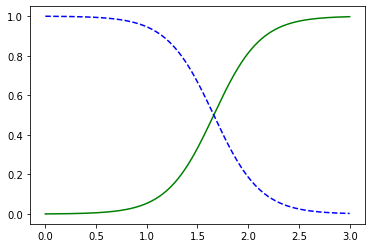

预测： [1 0]
预测： [2]
对应的概率： [[6.38014896e-07 5.74929995e-02 9.42506362e-01]]


In [37]:
# 逻辑回归
# 就像其他线性模型，逻辑回归模型也可以l1或者l2惩罚使用进行正则化。Scikit-Learn 默认添加了l2惩罚。
# 预测概率
from sklearn import datasets
iris = datasets.load_iris()
X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(np.int)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.show()
print('预测：',log_reg.predict([[1.7], [1.5]]))
# 多类别Logistic回归(Softmax 回归)
# 它的损失函数是Logistic回归损失函数的线性求和
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)
print('预测：',softmax_reg.predict([[5, 2]]))
print('对应的概率：',softmax_reg.predict_proba([[5, 2]]))
